In [ ]:
!pip install tensorflow

In [ ]:
# Bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
import tensorflow as tf
import statistics  as sts
import seaborn as srn
from google.colab import files


In [ ]:
upload = files.upload()
dataset = pd.read_csv("credito.csv", sep=",")
dataset

Saving credito.csv to credito (2).csv


,IDCREDITO,DURACAO,HISTORICOCREDITO,PROPOSITO,VALOR,INVESTIMENTO,EMPREGO,TEMPOPARCELADO,ESTADOCIVIL,FIADOR,RESIDENCIA,IDADE,OUTROSFINALCIAMENTOS,HABILITACAO,EMPRESTIMOS,PROFISSAO,DEPENDENTES,SOCIOEMPRESA,ESTRANGEIRO,STATUS
0,2,48,2,1,5951,2,3.0,2,1,3,2.0,22,3,1.0,1,4,1,0,0,0
1,3,12,1,2,2096,2,4.0,2,4,3,3.0,49,3,1.0,1,3,2,0,0,1
2,4,42,2,3,7882,2,4.0,2,4,4,4.0,45,3,2.0,1,4,2,0,0,1
3,5,24,3,4,4870,2,3.0,3,4,3,4.0,53,3,2.0,2,4,2,0,0,0
4,6,36,2,2,9055,1,3.0,2,4,3,4.0,35,3,2.0,1,3,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,505,24,2,4,1207,2,1.0,4,1,3,4.0,24,3,3.0,1,999,1,0,0,0
996,834,24,2,1,5084,1,2.0,2,1,3,4.0,42,3,1.0,1,999,1,1,0,1
997,234,18,0,1,866,2,3.0,4,3,4,2.0,25,3,1.0,1,3,1,0,0,1
998,474,6,0,10,1238,1,5.0,4,4,3,4.0,36,3,1.0,1,1,2,1,0,1


Verificando nulls

In [ ]:
dataset.isnull().sum()

IDCREDITO                0
DURACAO                  0
HISTORICOCREDITO         0
PROPOSITO                0
VALOR                    0
INVESTIMENTO             0
EMPREGO                 10
TEMPOPARCELADO           0
ESTADOCIVIL              0
FIADOR                   0
RESIDENCIA               7
IDADE                    0
OUTROSFINALCIAMENTOS     0
HABILITACAO              9
EMPRESTIMOS              0
PROFISSAO                0
DEPENDENTES              0
SOCIOEMPRESA             0
ESTRANGEIRO              0
STATUS                   0
dtype: int64

In [ ]:
dataset['DURACAO'].describe()

count    1000.000000
mean       20.903000
std        12.058814
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: DURACAO, dtype: float64

In [ ]:
dataset['HISTORICOCREDITO'].describe()


count    1000.000000
mean        1.999000
std         1.005988
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: HISTORICOCREDITO, dtype: float64

In [ ]:
dataset['PROPOSITO'].describe()

count    1000.000000
mean        3.414000
std         2.033898
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        10.000000
Name: PROPOSITO, dtype: float64

In [ ]:
dataset['VALOR'].describe()

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: VALOR, dtype: float64

In [ ]:
dataset['INVESTIMENTO'].describe()

count    1000.000000
mean        2.285000
std         1.133605
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: INVESTIMENTO, dtype: float64

In [ ]:
dataset['TEMPOPARCELADO'].describe()

count    1000.000000
mean        2.973000
std         1.118715
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: TEMPOPARCELADO, dtype: float64

In [ ]:
dataset['ESTADOCIVIL'].describe()

count    1000.000000
mean        2.878000
std         1.350904
min         1.000000
25%         1.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: ESTADOCIVIL, dtype: float64

In [ ]:
dataset['FIADOR'].describe()

count    1000.000000
mean        3.011000
std         0.308178
min         1.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: FIADOR, dtype: float64

In [ ]:
dataset['RESIDENCIA'].describe()

count    993.000000
mean       2.841893
std        1.103594
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: RESIDENCIA, dtype: float64

In [ ]:
dataset['IDADE'].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: IDADE, dtype: float64

In [ ]:
dataset['OUTROSFINALCIAMENTOS'].describe()

count    1000.000000
mean        2.675000
std         0.705601
min         1.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: OUTROSFINALCIAMENTOS, dtype: float64

In [ ]:
dataset['HABILITACAO'].describe()

count    1000.000000
mean        1.457000
std         0.773789
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: HABILITACAO, dtype: float64

In [ ]:
dataset['EMPRESTIMOS'].describe()

count    1000.000000
mean        1.407000
std         0.577654
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: EMPRESTIMOS, dtype: float64

Tratamento das profissoes

In [ ]:
dataset['PROFISSAO'].describe()

count    1000.000000
mean       12.273000
std        94.086358
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max       999.000000
Name: PROFISSAO, dtype: float64

In [ ]:
modaP = sts.mode(dataset['PROFISSAO'])
modaP

4

In [ ]:
dataset.loc[(dataset['PROFISSAO'] <  0 )  | ( dataset['PROFISSAO'] >  4), 'PROFISSAO' ] = modaP

Text(0.5, 1.0, 'PROFISSAO')

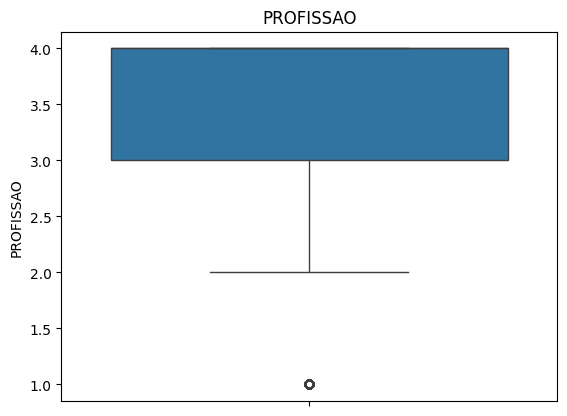

In [ ]:
srn.boxplot(dataset['PROFISSAO'], ).set_title('PROFISSAO')

In [ ]:
dataset['DEPENDENTES'].describe()

count    1000.000000
mean        1.155000
std         0.362086
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: DEPENDENTES, dtype: float64

In [ ]:
dataset['SOCIOEMPRESA'].describe()

count    1000.000000
mean        0.404000
std         0.490943
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: SOCIOEMPRESA, dtype: float64

In [ ]:
dataset['ESTRANGEIRO'].describe()

count    1000.000000
mean        0.037000
std         0.188856
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: ESTRANGEIRO, dtype: float64

In [ ]:
dataset['STATUS'].describe()

count    1000.000000
mean        0.700000
std         0.458487
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: STATUS, dtype: float64

Substituindo os null pela moda de emprego

In [ ]:
dataset['EMPREGO'].describe()

count    990.000000
mean       2.704040
std        1.130639
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        5.000000
Name: EMPREGO, dtype: float64

In [ ]:
moda = sts.mode(dataset['EMPREGO'])
moda

3.0

In [ ]:
dataset['EMPREGO'].fillna(moda, inplace=True)

Substituindo os null pela moda de Residencia

In [ ]:
modaR = sts.mode(dataset['RESIDENCIA'])
modaR

4.0

In [ ]:
dataset['RESIDENCIA'].fillna(modaR, inplace=True)

Substituindo os null pela moda de HABILITACAO

In [ ]:
modaH = sts.mode(dataset['HABILITACAO'])
modaH

1.0

In [ ]:
dataset['HABILITACAO'].fillna(modaH, inplace=True)

In [ ]:
dataset2 = dataset

In [ ]:
dataset2

,IDCREDITO,DURACAO,HISTORICOCREDITO,PROPOSITO,VALOR,INVESTIMENTO,EMPREGO,TEMPOPARCELADO,ESTADOCIVIL,FIADOR,RESIDENCIA,IDADE,OUTROSFINALCIAMENTOS,HABILITACAO,EMPRESTIMOS,PROFISSAO,DEPENDENTES,SOCIOEMPRESA,ESTRANGEIRO,STATUS
0,2,48,2,1,5951,2,3.0,2,1,3,2.0,22,3,1.0,1,4,1,0,0,0
1,3,12,1,2,2096,2,4.0,2,4,3,3.0,49,3,1.0,1,3,2,0,0,1
2,4,42,2,3,7882,2,4.0,2,4,4,4.0,45,3,2.0,1,4,2,0,0,1
3,5,24,3,4,4870,2,3.0,3,4,3,4.0,53,3,2.0,2,4,2,0,0,0
4,6,36,2,2,9055,1,3.0,2,4,3,4.0,35,3,2.0,1,3,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,505,24,2,4,1207,2,1.0,4,1,3,4.0,24,3,3.0,1,4,1,0,0,0
996,834,24,2,1,5084,1,2.0,2,1,3,4.0,42,3,1.0,1,4,1,1,0,1
997,234,18,0,1,866,2,3.0,4,3,4,2.0,25,3,1.0,1,3,1,0,0,1
998,474,6,0,10,1238,1,5.0,4,4,3,4.0,36,3,1.0,1,1,2,1,0,1


In [ ]:
sc = StandardScaler()
datavalor = sc.transform(dataset['VALOR'])
datavalor

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

Separação das variaveis dependentes e independentes

In [ ]:
X = dataset.iloc[:,1:19].values
y = dataset.iloc[:, 19].values
X

array([[48.,  2.,  1., ...,  1.,  0.,  0.],
       [12.,  1.,  2., ...,  2.,  0.,  0.],
       [42.,  2.,  3., ...,  2.,  0.,  0.],
       ...,
       [18.,  0.,  1., ...,  1.,  0.,  0.],
       [ 6.,  0., 10., ...,  2.,  1.,  0.],
       [24.,  0.,  6., ...,  1.,  1.,  0.]])

Separação em treino e teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(len(X_train),len(X_test),len(y_train),len(y_test))

700 300 700 300


In [ ]:
classifier = Sequential()
classifier.add(Dense(units = 96, kernel_initializer = 'uniform', activation = 'relu', input_dim = 18 ))
#classifier.add(BatchNormalization())
classifier.add(Dropout(0.25))
classifier.add(Dense(units = 48, kernel_initializer = 'uniform', activation = 'relu'))
#classifier.add(BatchNormalization())
classifier.add(Dropout(0.25))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
#custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.96,
    staircase=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
classifier.compile(optimizer=optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 64, epochs = 750, validation_data =(X_test , y_test))

Epoch 1/750
11/11 [==============================] - 2s 40ms/step - loss: 1.3616 - accuracy: 0.5129 - val_loss: 0.6851 - val_accuracy: 0.7500
Epoch 2/750
11/11 [==============================] - 0s 12ms/step - loss: 0.9125 - accuracy: 0.6086 - val_loss: 1.0152 - val_accuracy: 0.2500
Epoch 3/750
11/11 [==============================] - 0s 12ms/step - loss: 0.7636 - accuracy: 0.5614 - val_loss: 0.6458 - val_accuracy: 0.7500
Epoch 4/750
11/11 [==============================] - 0s 10ms/step - loss: 0.7257 - accuracy: 0.6471 - val_loss: 0.7020 - val_accuracy: 0.2733
Epoch 5/750
11/11 [==============================] - 0s 8ms/step - loss: 0.6967 - accuracy: 0.5657 - val_loss: 0.6775 - val_accuracy: 0.7500
Epoch 6/750
11/11 [==============================] - 0s 8ms/step - loss: 0.7024 - accuracy: 0.6300 - val_loss: 0.6747 - val_accuracy: 0.7500
Epoch 7/750
11/11 [==============================] - 0s 8ms/step - loss: 0.6765 - accuracy: 0.6643 - val_loss: 0.6721 - val_accuracy: 0.7500
Epoch 8/7

In [ ]:
classifier.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_138 (Dense)           (None, 96)                1824      
                                                                 
 dropout_90 (Dropout)        (None, 96)                0         
                                                                 
 dense_139 (Dense)           (None, 48)                4656      
                                                                 
 dropout_91 (Dropout)        (None, 48)                0         
                                                                 
 dense_140 (Dense)           (None, 24)                1176      
                                                                 
 dense_141 (Dense)           (None, 1)                 25        
                                                                 
Total params: 7681 (30.00 KB)
Trainable params: 7681 